In [1]:
#objectove -> predict price of diamonds

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

<Axes: >

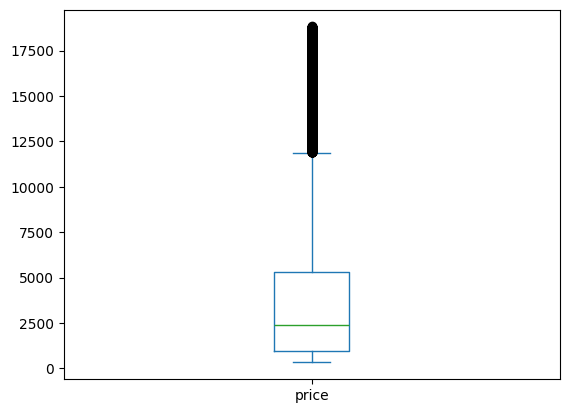

In [ ]:
df['price'].plot(kind='box')

<Axes: >

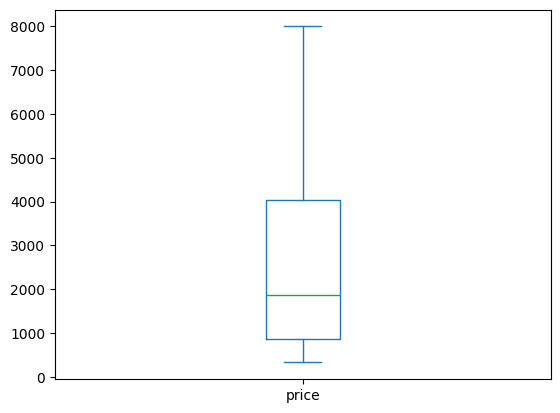

In [7]:
df=df.query('price<8000')
df['price'].plot(kind='box')

In [8]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

cut_encoder=LabelEncoder()
cut_encoder.fit(df['cut'])
df['cut']=cut_encoder.transform(df['cut'])

color_encoder=LabelEncoder()
color_encoder.fit(df['color'])
df['color']=color_encoder.transform(df['color'])

clarity_encoder=LabelEncoder()
clarity_encoder.fit(df['clarity'])
df['clarity']=clarity_encoder.transform(df['clarity'])

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#scale price - minmax scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# df['price']=scaler.fit_transform(df[['price']])

# df.sort_values(ascending=False, by='price').head()

In [10]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [11]:
X=df.drop(columns=['price','Unnamed: 0'],axis=1)
# X=df.drop(columns=['price','Unnamed: 0','y','z','cut','depth'],axis=1)
Y=df['price']

In [12]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)


In [13]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11327,1.08,2,1,3,61.7,57.0,6.55,6.60,4.06
51223,0.71,0,0,2,65.1,59.0,5.59,5.56,3.63
44523,0.52,4,1,5,59.2,59.0,5.23,5.27,3.11
42618,0.32,3,4,5,62.5,59.0,4.33,4.38,2.72
47551,0.51,3,0,4,59.5,57.0,5.24,5.21,3.11
...,...,...,...,...,...,...,...,...,...
11284,1.05,4,5,5,62.4,59.0,6.48,6.51,4.05
52338,0.70,4,3,4,63.1,57.0,5.70,5.61,3.57
45764,0.58,2,2,5,60.2,57.0,5.43,5.48,3.28
860,0.90,3,6,2,62.8,59.0,6.13,6.03,3.82


In [14]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74
53939,0.75,2,0,3,62.2,55.0,5.83,5.87,3.64
53940,0.71,3,1,2,60.5,55.0,5.79,5.74,3.49
53941,0.71,3,2,2,59.8,62.0,5.74,5.73,3.43


In [15]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#evaluate model
y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)

mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

MSE: 449325.5300861315
RMSE: 670.3174845445488
MAE: 456.9014556532771
R2: 0.8889718096066642


Text(0.5, 1.0, 'Correlation Matrix')

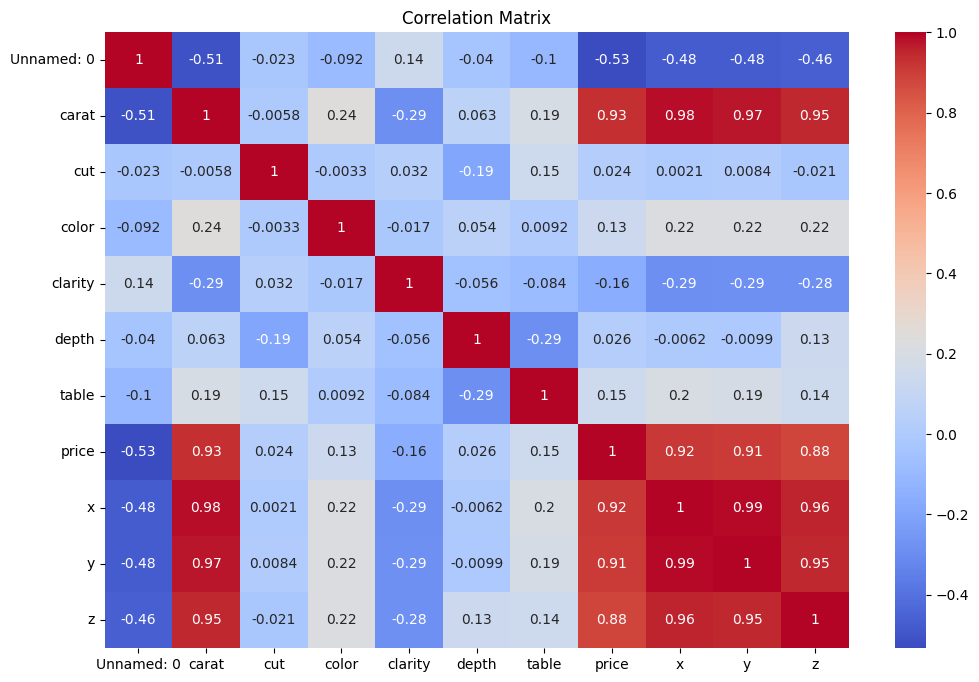

In [17]:
#correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


In [18]:
#train renadom forest regressor model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

#evaluate model
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)

mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

MSE: 82613.80056514306
RMSE: 287.42616541495147
MAE: 166.55483072451034
R2: 0.9795861571086212


In [19]:
#train renadom naive bayes model
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

#evaluate model
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)

mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

MSE: 510494.7297151489
RMSE: 714.489138976338
MAE: 449.6198748381528
R2: 0.8738569205387836


Original results
---------------
- MSE: 104248.93468487404
- RMSE: 322.8760360957035
- MAE: 199.03057051440743
- R2: 0.974240122598251

In [ ]:
#tune model - grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid={
    'n_estimators':[50,100,200],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth':[3,6,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

model=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train,Y_train)
best_model=grid_search.best_estimator_

#print best parameters
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


y_pred=best_model.predict(X_test)

#evaluate model
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)

mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1,